# Performance of Bio-NICA on image sources

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nica_algorithms import bio_nica
from util import permutation_error, add_fill_lines

### Load desired dataset

In [2]:
S = np.load('datasets/image/sources.npy')
X = np.load('datasets/image/mixtures.npy')

s_dim = S.shape[0]
x_dim = X.shape[0]
samples = S.shape[1]

### Sources

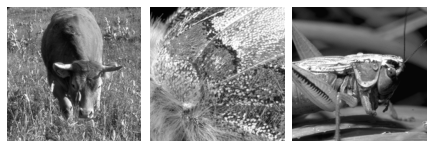

In [3]:
figure = plt.figure(figsize=(6,2))

for i in range(s_dim):
    plt.subplot(1,s_dim,i+1)
    plt.imshow(S[i].reshape(252,252), cmap="gray")
    plt.axis('off')

figure.tight_layout(pad=0.5)

plt.show()

### Mixtures

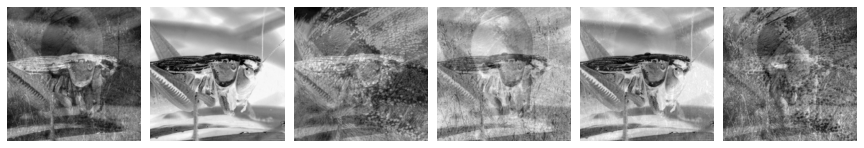

In [4]:
figure = plt.figure(figsize=(12,2))

for i in range(x_dim):
    plt.subplot(1,x_dim,i+1)
    plt.imshow(X[i].reshape(252,252), cmap="gray")
    plt.axis('off')

figure.tight_layout(pad=0.5)

plt.show()

### Bio-NICA

In [5]:
epochs = 10; iters = epochs*samples

Epoch 1:
Recovered sources:


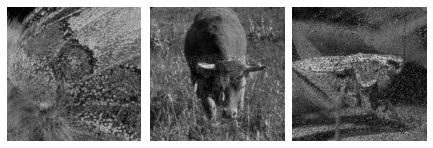

Epoch 2:
Recovered sources:


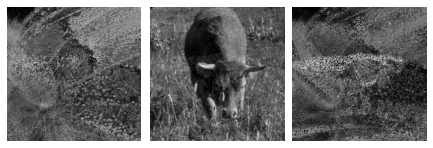

Epoch 3:
Recovered sources:


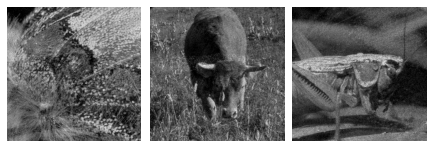

Epoch 4:
Recovered sources:


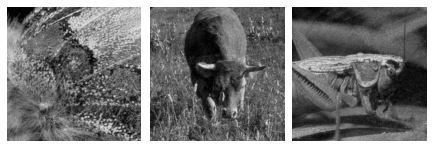

Epoch 5:
Recovered sources:


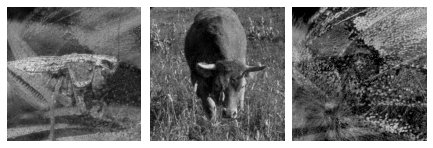

Epoch 6:
Recovered sources:


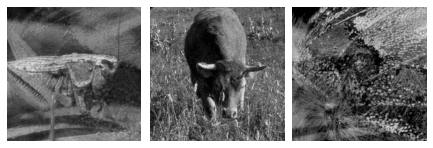

Epoch 7:
Recovered sources:


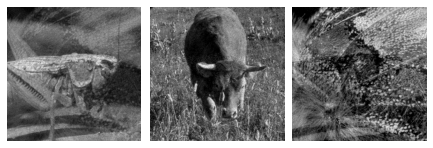

Epoch 8:
Recovered sources:


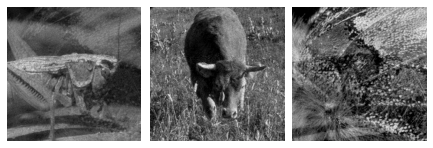

Epoch 9:
Recovered sources:


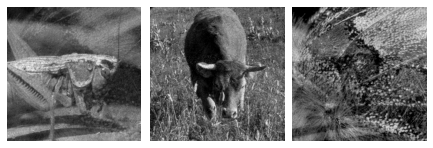

Epoch 10:
Recovered sources:


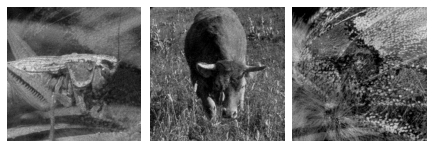

In [6]:
bionica = bio_nica(s_dim, x_dim, 'image')
bionica_Y = np.zeros((s_dim,samples))

for i_epoch in range(epochs):
    
    print(f'Epoch {i_epoch+1}:')

    idx = np.random.permutation(samples) # random permutation
    
    for i_sample in range(samples):
        
        x = X[:,idx[i_sample]]
        bionica_Y[:,i_sample] = bionica.fit_next(x)
        
    print(f'Recovered sources:')
        
    # Compute the inverse of the final permutation:

    inv_idx = np.argsort(idx)
    
    Y = bionica_Y[:,inv_idx[:]]

    figure = plt.figure(figsize=(6,2))

    for i in range(s_dim):
        plt.subplot(1,s_dim,i+1)
        plt.imshow(Y[i].reshape(252,252), cmap="gray")
        plt.axis('off')

    figure.tight_layout(pad=0.5)

    plt.show()